# Cityscapes Datasets Preparation

## Download Fine Annotations

In [68]:
import os
import shutil
import zipfile

datasets_dir = "datasets"
if os.path.exists(datasets_dir):
  shutil.rmtree(datasets_dir)

# Get the Kaggle API Key. https://www.kaggle.com/docs/api#authentication
# - Go to Kaggle and log in.
# - Click on your profile picture (top right), then select Settings.
# - Scroll down to the API section and click Create New API Token.
# - A file named kaggle.json will be downloaded.
from google.colab import files
files.upload()  # This will prompt you to upload the kaggle.json file

# Move kaggle key to proper location
os.makedirs("/root/.kaggle", exist_ok=True)
shutil.move("kaggle.json", "/root/.kaggle/kaggle.json")
os.chmod("/root/.kaggle/kaggle.json", 600)

Saving kaggle.json to kaggle.json


In [69]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("devmaxime/cityscapes-fine-annotations")

print("Path to dataset files:", path)

100%|██████████| 240M/240M [00:08<00:00, 31.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/devmaxime/cityscapes-fine-annotations/versions/1


In [70]:
os.makedirs("datasets", exist_ok=True)
shutil.move(path, "datasets")

'datasets/1'

In [71]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

def get_all_files(dir_name):
  file_paths = []
  for root, dirs, files in os.walk(dir_name):
    for file in files:
      file_paths.append(os.path.join(root, file))
  return file_paths

all_files = get_all_files("datasets/1")
print(len(all_files))
print(all_files[2])

train_color_label_files = [file for file in all_files if "gtFine_color" in file and "train" in file]
test_color_label_files = [file for file in all_files if "gtFine_color" in file and "test" in file]
val_color_label_files = [file for file in all_files if "gtFine_color" in file and "val" in file]
print(len(train_color_label_files))
print(len(test_color_label_files))
print(len(val_color_label_files))

train_labelIds_files = [file for file in all_files if "gtFine_labelIds" in file and "train" in file]
test_labelIds_files = [file for file in all_files if "gtFine_labelIds" in file and "test" in file]
val_labelIds_files = [file for file in all_files if "gtFine_labelIds" in file and "val" in file]
print(len(train_labelIds_files))
print(len(test_labelIds_files))
print(len(val_labelIds_files))


20002
datasets/1/gtFine/val/lindau/lindau_000031_000019_gtFine_instanceIds.png
2975
1525
500
2975
1525
500


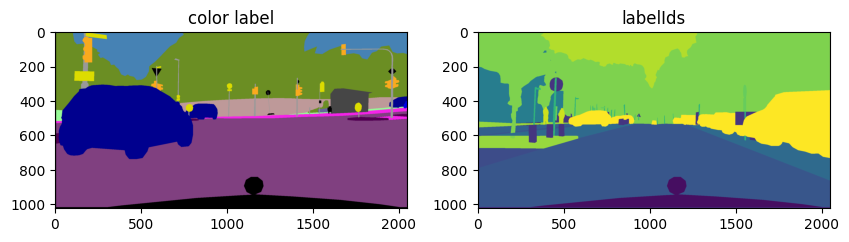

In [72]:
color_label_img = np.array(Image.open(train_color_label_files[0]))
labelIds_img = np.array(Image.open(train_labelIds_files[0]))

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("color label")
axis[0].imshow(color_label_img)
axis[1].set_title("labelIds")
axis[1].imshow(labelIds_img)
plt.show()

## Reorgnize Label Images
I only need the images with label ids. Pack them all to a folder and zip it.

The structure should be like:
- cityscapes/train/label_ids/filename.png
- cityscapes/val/label_ids/filename.png

In [73]:
# Create folders
shutil.rmtree("cityscapes", ignore_errors=True)
os.makedirs("cityscapes", exist_ok=True)
os.makedirs("cityscapes/train", exist_ok=True)
os.makedirs("cityscapes/val", exist_ok=True)
os.makedirs("cityscapes/train/label_ids", exist_ok=True)
os.makedirs("cityscapes/val/label_ids", exist_ok=True)

for file in train_labelIds_files:
  dst_filename = file.replace("_gtFine_labelIds", "")
  dst_filename = os.path.basename(dst_filename)
  shutil.copy(file, os.path.join("cityscapes/train/label_ids/", dst_filename))

for file in val_labelIds_files:
  dst_filename = file.replace("_gtFine_labelIds", "")
  dst_filename = os.path.basename(dst_filename)
  shutil.copy(file, os.path.join("cityscapes/val/label_ids/", dst_filename))

2975
500


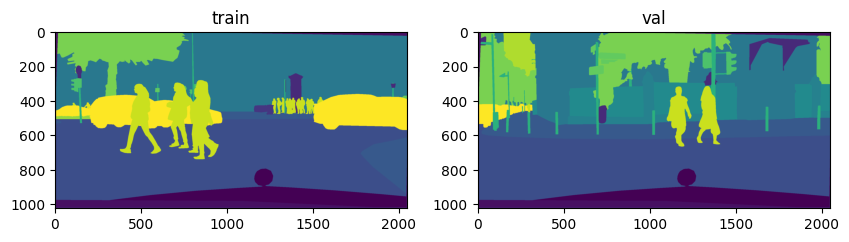

In [74]:
# Check files
new_train_labelIds_files = os.listdir("cityscapes/train/label_ids")
new_val_labelIds_files = os.listdir("cityscapes/val/label_ids")
print(len(new_train_labelIds_files))
print(len(new_val_labelIds_files))

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("train")
axis[0].imshow(Image.open(os.path.join("cityscapes/train/label_ids", new_train_labelIds_files[0])))
axis[1].set_title("val")
axis[1].imshow(Image.open(os.path.join("cityscapes/val/label_ids", new_val_labelIds_files[0])))
plt.show()

## Download RGB Images

In [75]:
# Download latest version
path = kagglehub.dataset_download("chrisviviers/cityscapes-leftimg8bit-trainvaltest")

print("Path to dataset files:", path)

100%|██████████| 10.8G/10.8G [03:06<00:00, 62.1MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/chrisviviers/cityscapes-leftimg8bit-trainvaltest/versions/1


In [76]:
shutil.rmtree("datasets", ignore_errors=True)
os.makedirs("datasets", exist_ok=True)
shutil.move(path, "datasets")

'datasets/1'

2975
500
(1024, 2048, 3)
(1024, 2048, 3)


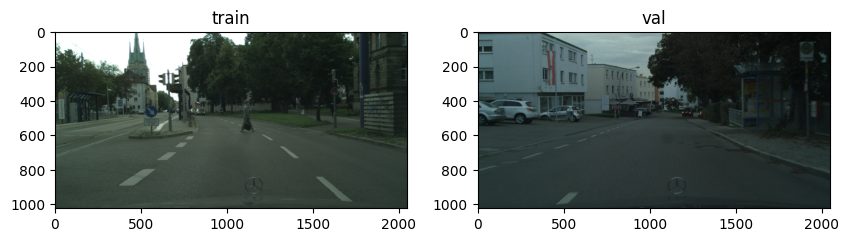

In [77]:
all_files = get_all_files("datasets/1")

train_rgb_files = [file for file in all_files if "leftImg8bit" in file and "train" in file]
val_rgb_files = [file for file in all_files if "leftImg8bit" in file and "val" in file]
print(len(train_rgb_files))
print(len(val_rgb_files))

train_rgb_img = np.array(Image.open(train_rgb_files[0]))
val_rgb_img = np.array(Image.open(val_rgb_files[0]))
print(train_rgb_img.shape)
print(val_rgb_img.shape)
fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("train")
axis[0].imshow(train_rgb_img)
axis[1].set_title("val")
axis[1].imshow(val_rgb_img)
plt.show()

## Reorgnize RGB Images
The struture should be:
- cityscapes/train/rgb/filename.png
- cityscapes/val/rgb/filename.png

In [80]:
os.makedirs("cityscapes/train/rgb", exist_ok=True)
os.makedirs("cityscapes/val/rgb", exist_ok=True)

for file in train_rgb_files:
  dst_filename = file.replace("_leftImg8bit", "")
  dst_filename = os.path.basename(dst_filename)
  shutil.copy(file, os.path.join("cityscapes/train/rgb/", dst_filename))

for file in val_rgb_files:
  dst_filename = file.replace("_leftImg8bit", "")
  dst_filename = os.path.basename(dst_filename)
  shutil.copy(file, os.path.join("cityscapes/val/rgb/", dst_filename))

2975
500


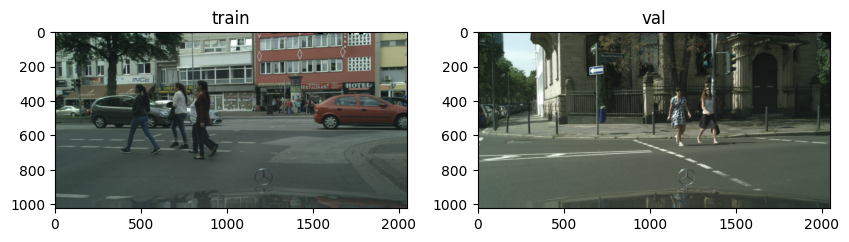

In [81]:
# Check rgb files
new_train_rgb_files = os.listdir("cityscapes/train/rgb")
new_val_rgb_files = os.listdir("cityscapes/val/rgb")
print(len(new_train_rgb_files))
print(len(new_val_rgb_files))

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("train")
axis[0].imshow(Image.open(os.path.join("cityscapes/train/rgb", new_train_rgb_files[0])))
axis[1].set_title("val")
axis[1].imshow(Image.open(os.path.join("cityscapes/val/rgb", new_val_rgb_files[0])))
plt.show()

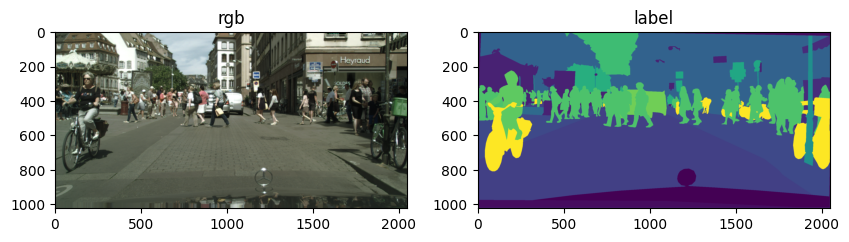

In [82]:
# Check relative rgb and label files

# Check if all files in rgb are also in label_ids
for file in new_train_rgb_files:
  if file not in new_train_labelIds_files:
    print(file)

fig, axis = plt.subplots(1, 2, figsize=(10, 5))
axis[0].set_title("rgb")
axis[0].imshow(Image.open(os.path.join("cityscapes/train/rgb", new_train_rgb_files[10])))
axis[1].set_title("label")
axis[1].imshow(Image.open(os.path.join("cityscapes/train/label_ids", new_train_rgb_files[10])))
plt.show()

## Zip and Download

In [83]:
shutil.rmtree("cityscape.zip", ignore_errors=True)
zip_filename = "cityscapes.zip"
shutil.make_archive("cityscapes", "zip", "cityscapes")

'/content/cityscapes.zip'